<a href="https://colab.research.google.com/github/hassaan921/Python_EDA_Portfolio/blob/main/Consumer_Analysis_Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Installing libraries in a single go**

In [ ]:
import importlib
import subprocess
import sys

def install_and_load(libraries):
    """
    A single function that imports multiple libraries in one input.
    """
    for lib in libraries:
        try:
            # Check if the library is installed or not
            importlib.import_module(lib)
            print(f"'{lib}' is already installed.")
        except ImportError:
            # Install the library if not found
            print(f"'{lib}' not found. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", lib])
        finally:
            # Import the library after installation and assign it to a global variable
            globals()[lib] = importlib.import_module(lib)
            globals()[lib] = globals()[lib]
            print(f"'{lib}' has been loaded.")

# Input the names of libraries
user_input = input("Enter library names separated by commas: ")
libraries = [lib.strip() for lib in user_input.split(",")]

# Install and load libraries
install_and_load(libraries)

Enter library names separated by commas: pandas, seaborn, numpy, missingno
'pandas' is already installed.
'pandas' has been loaded.
'seaborn' is already installed.
'seaborn' has been loaded.
'numpy' is already installed.
'numpy' has been loaded.
'missingno' is already installed.
'missingno' has been loaded.


### **2. Data Exploration and Processing**

In [ ]:
# reading the dataframe
af_treadmill = pandas.read_csv("/content/drive/MyDrive/Colab Notebooks/data sets/EDA_aerofit__treadmill_data - aerofit__treadmill_data.csv")

In [ ]:
# shape of the dataframe
af_treadmill.shape

(180, 9)

**1. The data looks logical, features are fathomable**

In [ ]:
af_treadmill.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


**2. checking for data types of features, number of observations, and any missing data on the onset**

In [ ]:
af_treadmill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
for column in af_treadmill:

  print(f"Unique attributes in {column}")
  print(af_treadmill[column].nunique())
  print("-----------------------------------------------")

print("End")

Unique attributes in Product
3
-----------------------------------------------
Unique attributes in Age
32
-----------------------------------------------
Unique attributes in Gender
2
-----------------------------------------------
Unique attributes in Education
8
-----------------------------------------------
Unique attributes in MaritalStatus
2
-----------------------------------------------
Unique attributes in Usage
6
-----------------------------------------------
Unique attributes in Fitness
5
-----------------------------------------------
Unique attributes in Income
62
-----------------------------------------------
Unique attributes in Miles
37
-----------------------------------------------
Unique attributes in AgeLabeled
3
-----------------------------------------------
Unique attributes in IncomeLevel
3
-----------------------------------------------
End


**3. Info() and describe() showed that no values are missing. This visualization confirms it too.**

<Axes: >

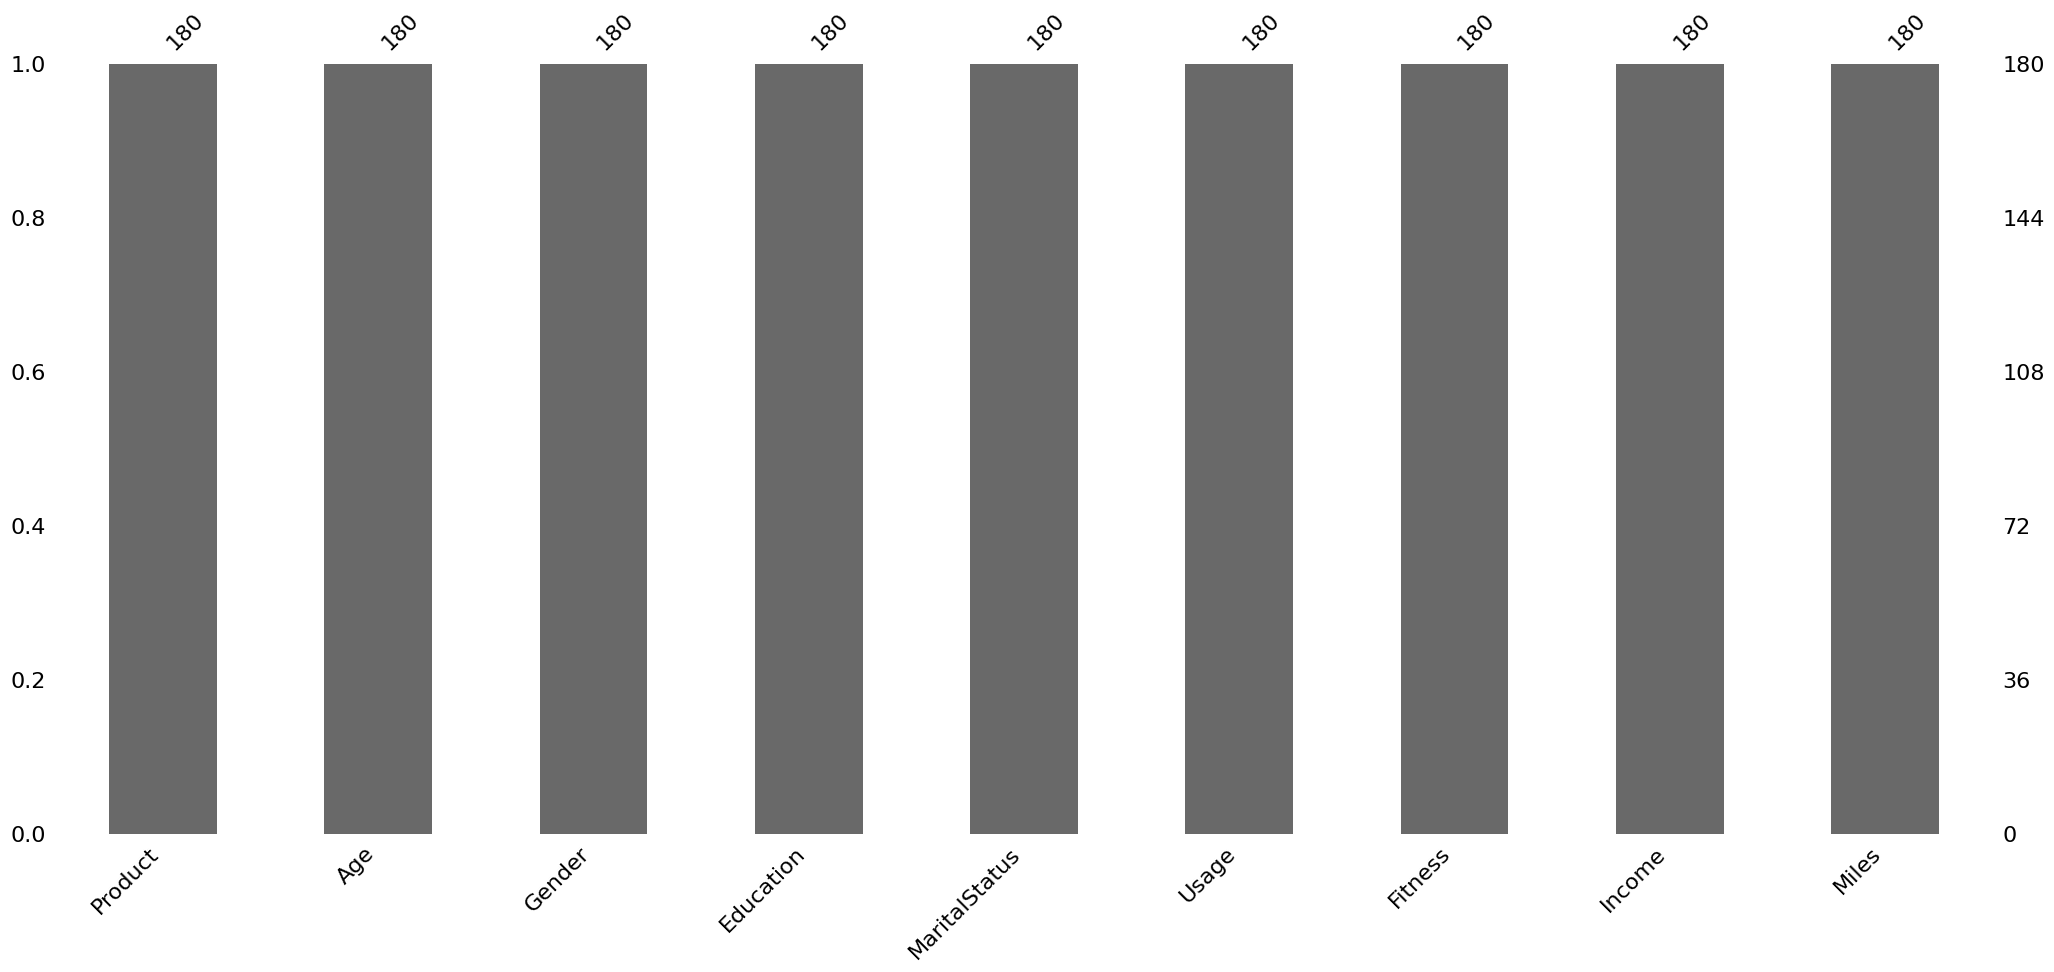

In [ ]:
# Checking for missing Values
missingno.bar(af_treadmill)

**4. No duplicates were found**

In [ ]:
# Looking for any duplicates
for column in af_treadmill:
  print(f"Duplicates in", {column})
  print(af_treadmill.duplicated().sum())

Duplicates in {'Product'}
0
Duplicates in {'Age'}
0
Duplicates in {'Gender'}
0
Duplicates in {'Education'}
0
Duplicates in {'MaritalStatus'}
0
Duplicates in {'Usage'}
0
Duplicates in {'Fitness'}
0
Duplicates in {'Income'}
0
Duplicates in {'Miles'}
0


### **3. Statistical Summary of Numeric and Categorical Features**

In [ ]:
# Categorical Data Description
af_treadmill.describe(include = ["O"])

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
# Numeric Data Description
af_treadmill.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### **4. Non-Graphical Analysis:**

In [ ]:
# Separating categorical features from original dataset
af_treadmill_non_numeric = af_treadmill.select_dtypes(exclude=[numpy.number])

non_numeric_cols = af_treadmill_non_numeric.columns.values

non_numeric_cols

array(['Product', 'Gender', 'MaritalStatus'], dtype=object)

**Combined code** for value counts and unique attributes for all categorical features

In [ ]:
for column in af_treadmill_non_numeric:

  print(f"Value count for {column}")
  print(af_treadmill_non_numeric[column].value_counts())
  print("\n")
  print(f"Unique attributes in {column}")
  print(af_treadmill_non_numeric[column].unique())
  print("-----------------------------------------------")
  print("\n")

print("End")

Value count for Product
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


Unique attributes in Product
['KP281' 'KP481' 'KP781']
-----------------------------------------------


Value count for Gender
Gender
Male      104
Female     76
Name: count, dtype: int64


Unique attributes in Gender
['Male' 'Female']
-----------------------------------------------


Value count for MaritalStatus
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


Unique attributes in MaritalStatus
['Single' 'Partnered']
-----------------------------------------------


End


### **5. Graphical Analysis: Univariate Analysis of Numerical Features**

After performing the outlier detection and dropping to test their impact, I decided to leave the outliers in the dataset as they did not considerably impact the analyses below.

I have explained my reasoning in section 10: Outliers Detection below.


In [ ]:
# defined this module separately to assign an alias, which I could not do in the first function for other modules
import matplotlib.pyplot as plt

In [ ]:
# defining a new variable containing all numeric features

af_treadmill_numeric = af_treadmill.select_dtypes(include=[numpy.number])
numeric_cols = af_treadmill_numeric.columns.values

numeric_cols

array(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'],
      dtype=object)

#### **distribution plots**

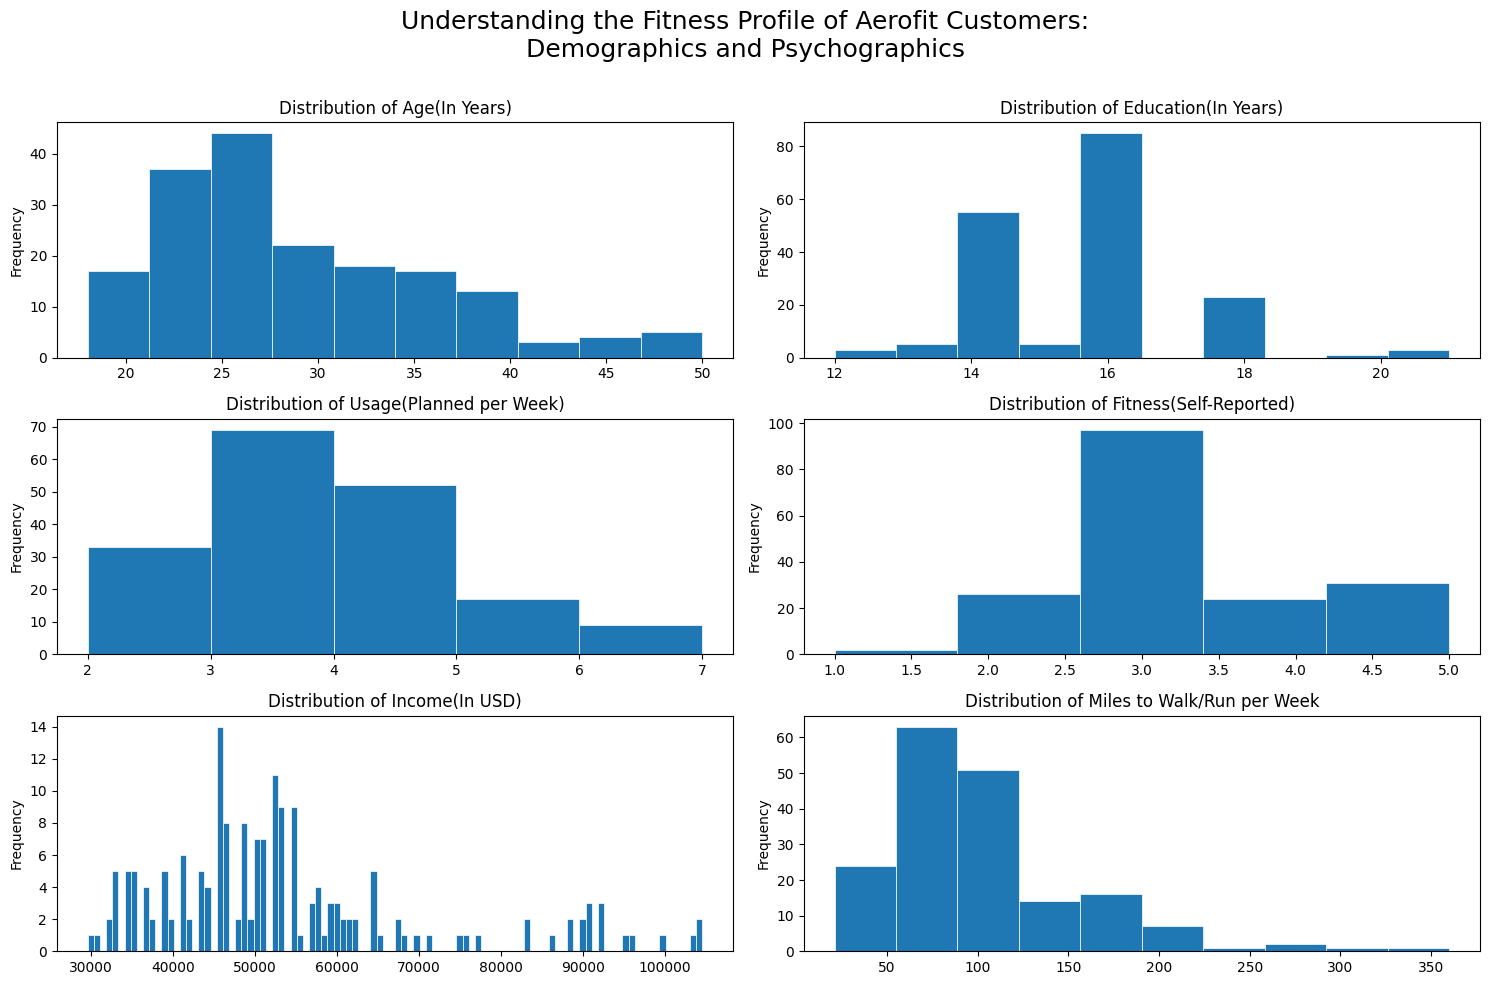

In [ ]:
# setting the number, orientation, and sizes of various subplots
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(15,10))
fig.suptitle('Understanding the Fitness Profile of Aerofit Customers:\nDemographics and Psychographics\n', size = 18)

# plotting distribution/histogram plot for numeric features

axes[0,0].hist(af_treadmill['Age'],bins=10, linewidth=0.5, edgecolor="white")
axes[0,0].set(xlabel='', ylabel='Frequency')
axes[0,0].set_title("Distribution of Age(In Years)");

axes[0,1].hist(af_treadmill['Education'],bins=10, linewidth=0.5, edgecolor="white")
axes[0,1].set(xlabel='', ylabel='Frequency')
axes[0,1].set_title("Distribution of Education(In Years)");

axes[1,0].hist(af_treadmill['Usage'],bins=5, linewidth=0.5, edgecolor="white")
axes[1,0].set(xlabel='', ylabel='Frequency')
axes[1,0].set_title("Distribution of Usage(Planned per Week)");

axes[1,1].hist(af_treadmill['Fitness'],bins=5, linewidth=0.5, edgecolor="white")
axes[1,1].set(xlabel='', ylabel='Frequency')
axes[1,1].set_title("Distribution of Fitness(Self-Reported)");

axes[2,0].hist(af_treadmill['Income'],bins=100, linewidth=0.5, edgecolor="white")
axes[2,0].set(xlabel='', ylabel='Frequency')
axes[2,0].set_title("Distribution of Income(In USD)");

axes[2,1].hist(af_treadmill['Miles'],bins=10, linewidth=0.5, edgecolor="white")
axes[2,1].set(xlabel='', ylabel='Frequency')
axes[2,1].set_title("Distribution of Miles to Walk/Run per Week");

plt.tight_layout()

#### **Density Plots**
Count plots did not seem an optimal choice for visualizing numerical data, so instead, using density plots to visualize density of data as well as looking for patterns not easily discernible in distribution plots above.

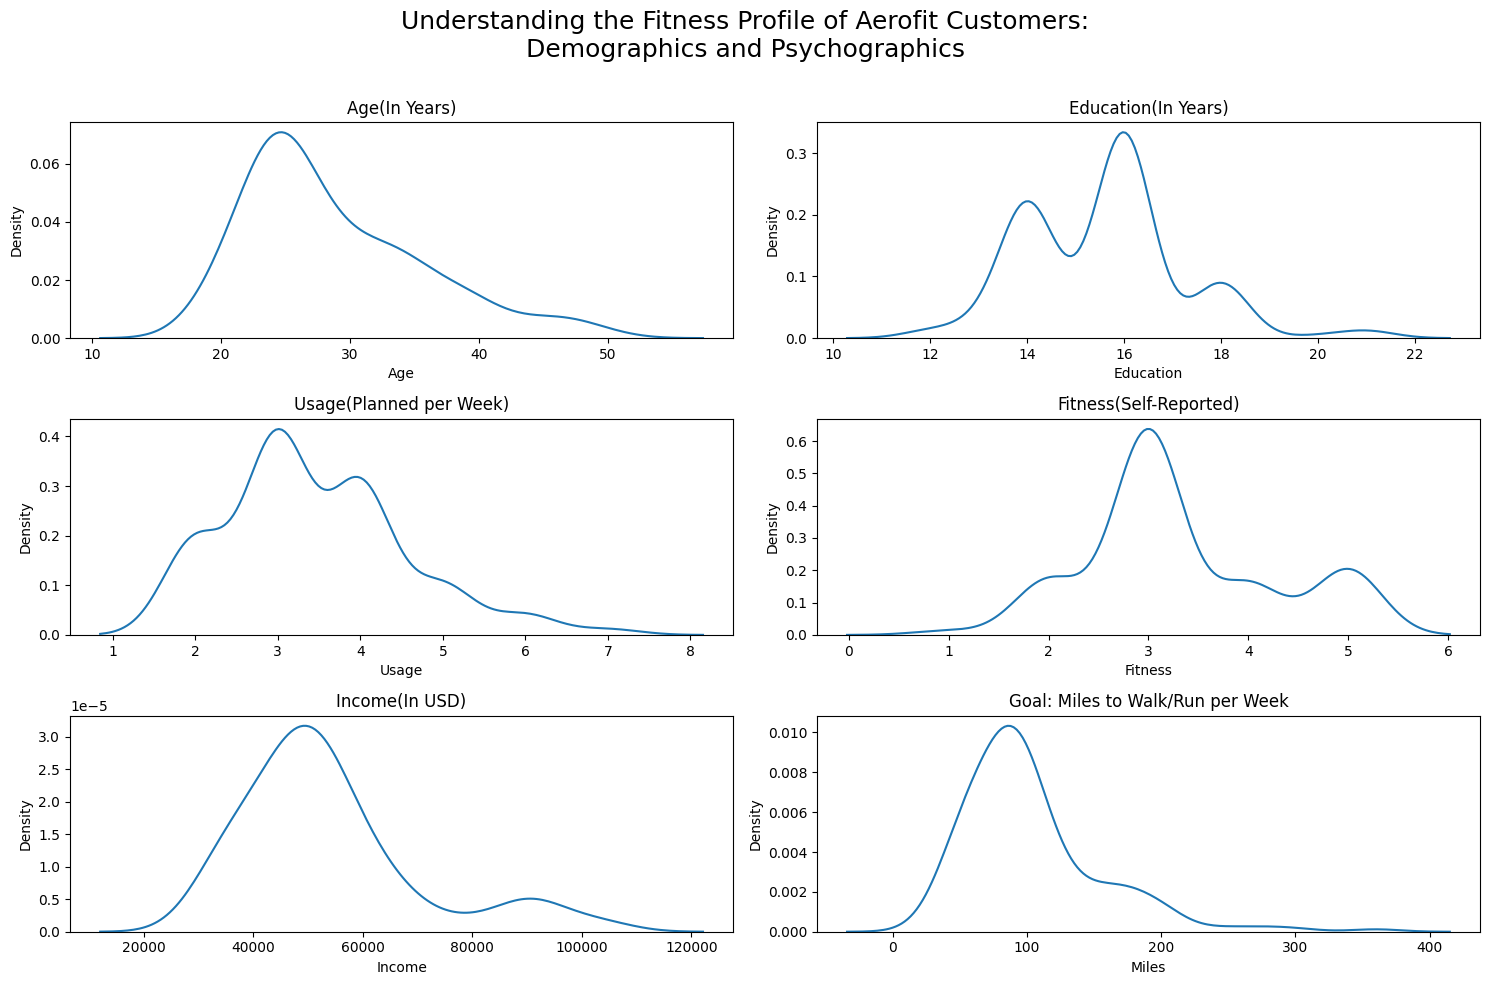

In [ ]:
# setting the number, orientation, and sizes of various subplots

# plotting kernel density plots for numeric features

fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(15,10))
fig.suptitle('Understanding the Fitness Profile of Aerofit Customers:\nDemographics and Psychographics\n', size = 18)

seaborn.kdeplot(af_treadmill_numeric['Age'], ax=axes[0,0])
axes[0,0].set_title("Age(In Years)");

seaborn.kdeplot(af_treadmill_numeric['Education'], ax=axes[0,1])
axes[0,1].set_title("Education(In Years)");

seaborn.kdeplot(af_treadmill_numeric['Usage'], ax=axes[1,0])
axes[1,0].set_title("Usage(Planned per Week)");

seaborn.kdeplot(af_treadmill_numeric['Fitness'], ax=axes[1,1])
axes[1,1].set_title("Fitness(Self-Reported)");

seaborn.kdeplot(af_treadmill_numeric['Income'], ax=axes[2,0])
axes[2,0].set_title("Income(In USD)");

seaborn.kdeplot(af_treadmill_numeric['Miles'], ax=axes[2,1])
axes[2,1].set_title("Goal: Miles to Walk/Run per Week");

plt.tight_layout()

#### **Boxplots**

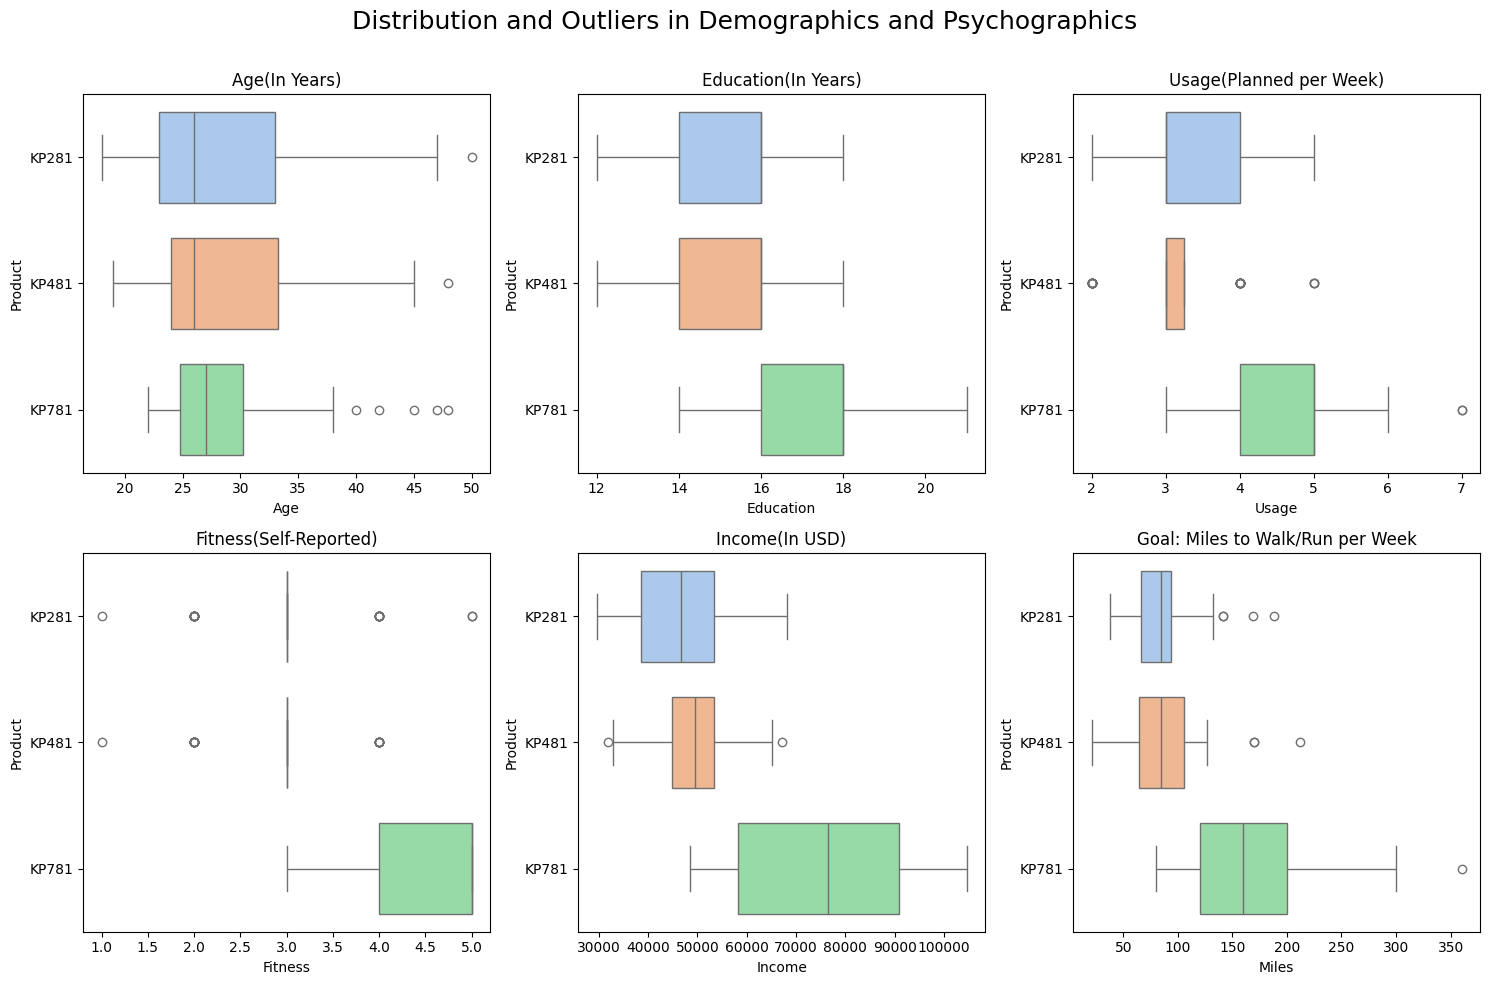

In [ ]:
# Plotting Boxplots to visualize distribution and outliers

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
fig.suptitle('Distribution and Outliers in Demographics and Psychographics\n', size = 18)

seaborn.boxplot(ax=axes[0,0], data=af_treadmill, x='Age', y='Product', hue='Product', palette='pastel', gap=.1)
axes[0,0].set_title("Age(In Years)");

seaborn.boxplot(ax=axes[0, 1], data=af_treadmill, x='Education', y='Product', hue='Product', palette='pastel', gap=.1)
axes[0,1].set_title("Education(In Years)");

seaborn.boxplot(ax=axes[0, 2], data=af_treadmill, x='Usage', y='Product',hue='Product', palette='pastel', gap=.1)
axes[0,2].set_title("Usage(Planned per Week)");

seaborn.boxplot(ax=axes[1, 0], data=af_treadmill, x='Fitness', y='Product',hue='Product', palette='pastel', gap=.1)
axes[1,0].set_title("Fitness(Self-Reported)");

seaborn.boxplot(ax=axes[1, 1], data=af_treadmill, x='Income', y='Product',hue='Product', palette='pastel', gap=.1)
axes[1,1].set_title("Income(In USD)");

seaborn.boxplot(ax=axes[1,2], data=af_treadmill, x='Miles', y='Product',hue='Product', palette='pastel', gap=.1)
axes[1,2].set_title("Goal: Miles to Walk/Run per Week");

plt.tight_layout()

### **6. Univariate Analysis - Categorical features:**

#### **Count Plots**

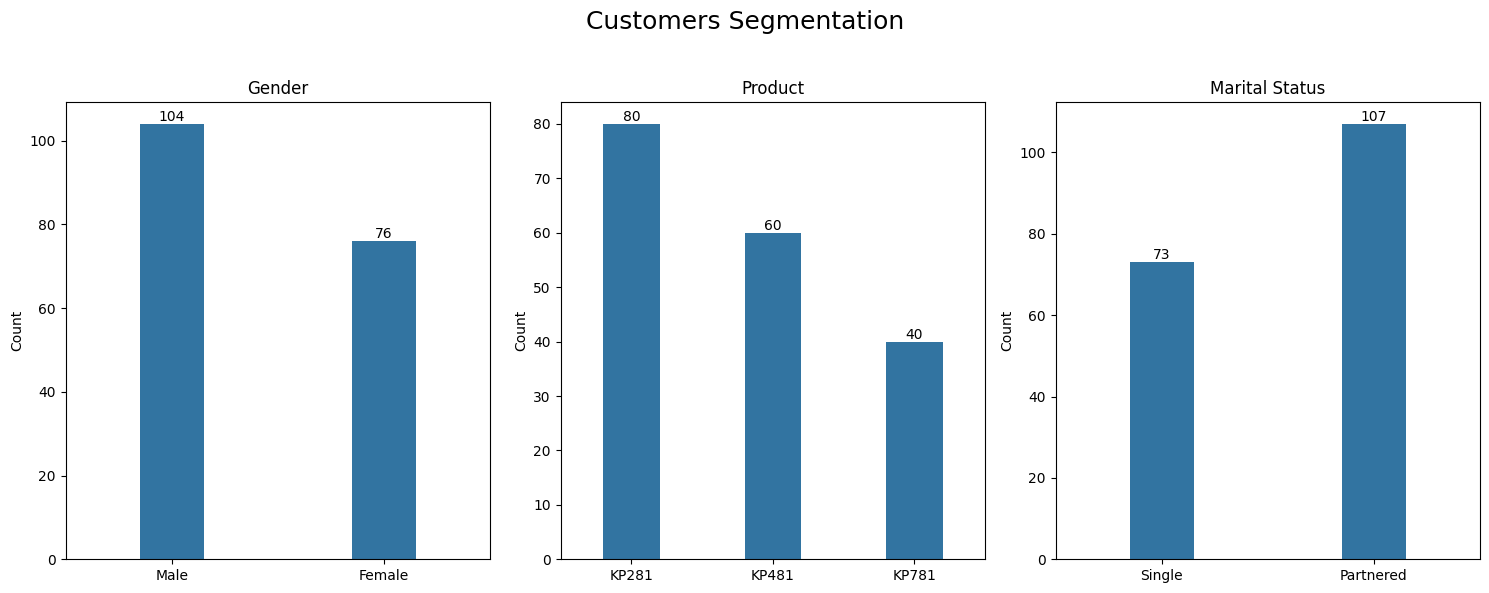

In [ ]:
# setting the number, orientation, and sizes of various subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
fig.suptitle('Customers Segmentation\n', size=18)


# plotting count plot for Gender
cp1 = seaborn.countplot(ax=axes[0], data=af_treadmill_non_numeric, x='Gender', width = 0.3)


# removed labels to prevent redundancy in plot and subplots' titles
cp1.set(xlabel='', ylabel='Count')
axes[0].set_title("Gender");


# displaying value labels on top of bars
abs_values1 = af_treadmill_non_numeric['Gender'].value_counts(ascending=False).values
cp1.bar_label(container=cp1.containers[0], labels=abs_values1)


# plotting count plot for Product
cp2 = seaborn.countplot(ax=axes[1], data=af_treadmill_non_numeric, x='Product', width = 0.4)


# removed labels for cp2
cp2.set(xlabel='', ylabel='Count')
axes[1].set_title("Product");


# displaying value labels on top of bars
abs_values2 = af_treadmill_non_numeric['Product'].value_counts(ascending=False).values
cp2.bar_label(container=cp2.containers[0], labels=abs_values2)


# plotting count plot for MaritalStatus
cp3 = seaborn.countplot(ax=axes[2], data=af_treadmill_non_numeric, x='MaritalStatus', width = 0.3)


# removed labels for cp3
cp3.set(xlabel='', ylabel='Count')
axes[2].set_title("Marital Status");


# Due to orientation of both bars, set the order of value labels ascending to prevent wrong labels
abs_values3 = af_treadmill_non_numeric['MaritalStatus'].value_counts(ascending=True).values

cp3.bar_label(container=cp3.containers[0], labels=abs_values3)

plt.tight_layout()

### **7. Bivariate Analysis: Chi-Square Test of Significance**

Doing a chi-square test for significance level 5%, it was found that:
- Gender and products has significant association (p-value: 0.001), whereas no significant association was found between products vs. age (p-value: 0.960) and marital status (p-value: 0.900)

#### _**Source(s) used to perform this step**:_
1. Technical Guide to Chi-Square Test: https://www.stratascratch.com/blog/chi-square-test-in-python-a-technical-guide/
2. Scipy module documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [ ]:
# Age is numeric, so binning into a categorical feature using cut()

binnames = ['Young Adult','Middle-Aged Adult','Late-Age Adult']

af_treadmill['AgeLabelled'] = pandas.cut(af_treadmill['Age'],
                     bins=[15,25,45,55],
                     labels=binnames)
af_treadmill

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeLabelled
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adult
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adult
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adult
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adult
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adult
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Middle-Aged Adult
176,KP781,42,Male,18,Single,5,4,89641,200,Middle-Aged Adult
177,KP781,45,Male,16,Single,5,5,90886,160,Middle-Aged Adult
178,KP781,47,Male,18,Partnered,4,5,104581,120,Late-Age Adult


In [ ]:
!pip install scipy

In [ ]:
# Chi-square Analysis

from scipy.stats import chi2_contingency

# Defined the categorical features and the target variable
categorical_features = ['Gender', 'MaritalStatus', 'AgeLabelled']
target_variable = 'Product'

# defining a function to run the chi-square test
def chi_square_test(feature, target):
    contingency_table = pandas.crosstab(af_treadmill[feature], af_treadmill[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Performing chi-square tests for each categorical feature
for feature in categorical_features:
    chi2, p = chi_square_test(feature, target_variable)
    print(f"Chi-Square Test for {feature} vs {target_variable}:")
    print("-------------------------")
    print(f"Chi-Square Statistic: {chi2}")
    print("-------------------------")
    print(f"p-value: {p}")
    print("-------------------------")

# p-value set for 95% confidence interval and 5% significance level
    if p < 0.05:
        print("Significant association found.")
    else:
        print("No significant association found.")
    print("\n")

Chi-Square Test for Gender vs Product:
-------------------------
Chi-Square Statistic: 12.923836032388664
-------------------------
p-value: 0.0015617972833158714
-------------------------
Significant association found.


Chi-Square Test for MaritalStatus vs Product:
-------------------------
Chi-Square Statistic: 0.0806554858532839
-------------------------
p-value: 0.9604745988058153
-------------------------
No significant association found.


Chi-Square Test for AgeLabelled vs Product:
-------------------------
Chi-Square Statistic: 1.0621752165223193
-------------------------
p-value: 0.9002261492105591
-------------------------
No significant association found.




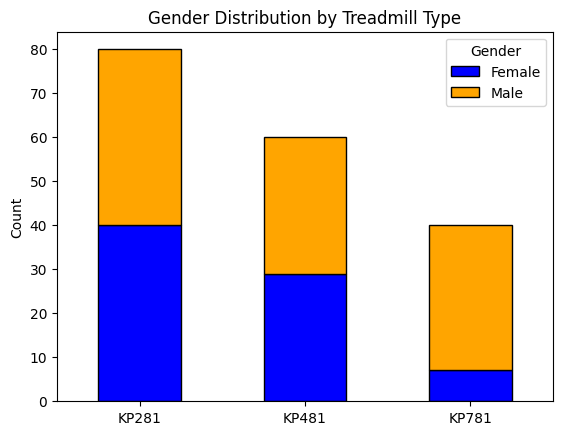

In [ ]:
# To visualize the significant association among gender and treadmill type
gender_distribution = af_treadmill.groupby(['Product', 'Gender']).size().unstack()

# Plot the stacked bar chart
gender_distribution.plot(kind='bar', stacked=True, color=['blue', 'orange'], edgecolor=['black'], linewidth=1)
plt.title('Gender Distribution by Treadmill Type')
plt.xlabel('')
plt.tick_params(axis='x',labelrotation=0)
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

### **8. Multivariate Analysis:**

#### **_Source used to perform this step_**
Seaborn Pairplot: A Guide: https://builtin.com/articles/seaborn-pairplot

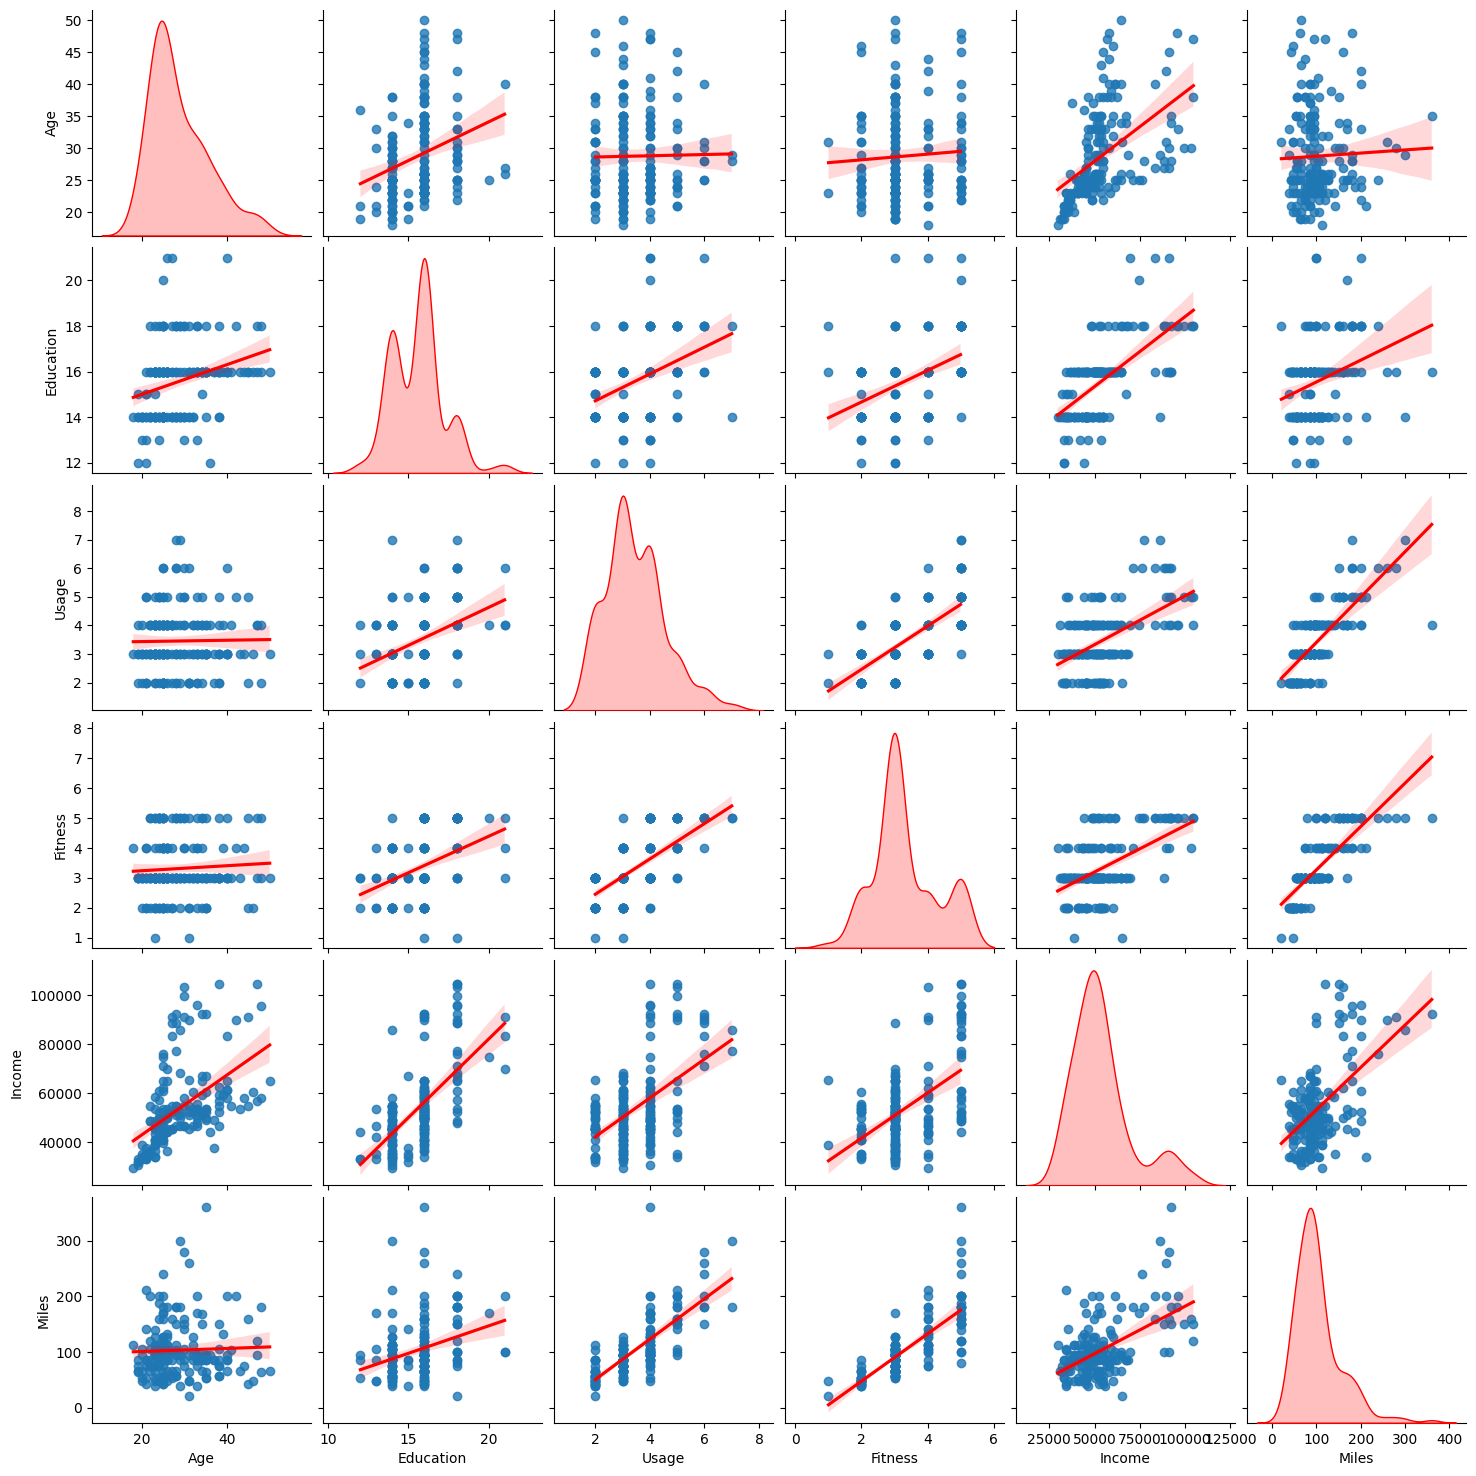

In [ ]:
numeric_col_pairs = seaborn.pairplot(af_treadmill_numeric,
                                     kind = "reg", # added regression line to visualize the relationship in numeric pairs
                                     plot_kws={'line_kws':{'color':'red'}}, # introduced color for easier reading
                                     diag_kind='kde', # replacing the default histograms with density plots on the diagonal
                                     diag_kws={'color':'red'}) # tweaked the color

### **9. Correlation Analysis**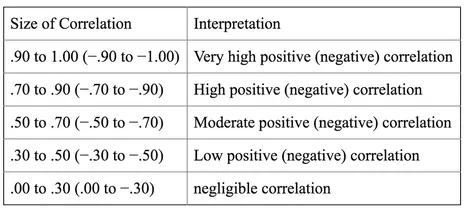

Based on the **pairplot** above and **heatmap** below, following relationships are of importance.




#### **Moderate to High Correlations:**

**Fitness and Miles:** There is a high positive correlation between Fitness and Miles (0.79). This suggests that individuals who self-reported themselves physically fit are more confident of their ability to walk/run long distances.

**Fitness and Usage:** There is a moderate positive correlation between Fitness and Usage (0.67). This suggests that individuals who are more physically fit are more sure of their frequent use of the treadmill.

**Income and Fitness:** A moderate positive correlation is observed between Income and Fitness (0.54). This suggests that individuals with higher incomes tend to rate themselves more physically fit.

**Income and Usage:** A moderate positive correlation exists between Income and Usage (0.52). This indicates that people with higher incomes are more likely to buy and consequently, use a treadmill.

#### **Weak Correlations:**

**Age and Fitness:** A weak positive correlation is observed between Age and Fitness (0.061). This indicates that aged individuals rate themselve lower on fitness levels.

**Age and Usage:** A weak positive correlation is observed between Age and Usage (0.015). This suggests that aged individuals are less likely to use the treadmill.

#### **_Source to perform this step: https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8_**

Text(0.5, 1.0, 'Correlation among Numeric Features\n')

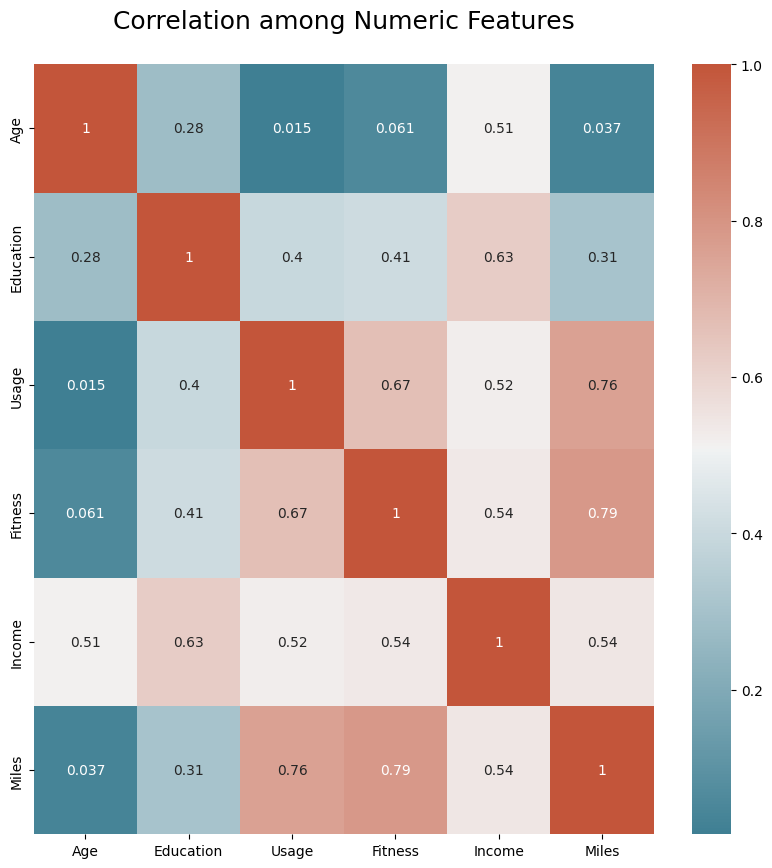

In [ ]:
# Plotting a heatmap for numeric features
fig, ax = plt.subplots(figsize=(10, 10))

corr = af_treadmill.select_dtypes(include = numpy.number).corr()# plot the heatmap
corheat=seaborn.heatmap(corr,
                        xticklabels=corr.columns,
                        yticklabels=corr.columns,
                        annot=True,
                        cmap=seaborn.diverging_palette(220, 20, as_cmap=True))

corheat.set_title('Correlation among Numeric Features\n', size = 18)

### **10. Outlier Detection:**

**_Source consulted:_** Guidelines for Removing and Handling Outliers in Data https://statisticsbyjim.com/basics/remove-outliers/
##### **Tukey's IQR Method**

In [ ]:
feature_list = ['Age', 'Education', 'Usage','Fitness', 'Income', 'Miles']

from collections import Counter

def IQR_method (df,n,features):
    # an empty list to store outlier indices
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = numpy.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = numpy.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    low_outliers = df[df[column] < Q1 - outlier_step]
    high_outliers = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', low_outliers.shape[0]+high_outliers.shape[0])

    return multiple_outliers

**There are 13 outliers in the data**

In [ ]:
af_outliers = IQR_method(af_treadmill,1,feature_list)
af_outliers

Total number of outliers is: 13


[178, 179, 161, 175, 155, 162, 164, 166, 167, 170, 171, 173, 176]

In [ ]:
outlier_indices = af_treadmill.loc[[178, 179, 161, 175, 155, 162, 164, 166, 167, 170, 171, 173, 176]]
outlier_indices[['Age','Education','Usage','Fitness','Income','Miles']]

,Age,Education,Usage,Fitness,Income,Miles
178,47,18,4,5,104581,120
179,48,18,4,5,95508,180
161,27,21,4,4,90886,100
175,40,21,6,5,83416,200
155,25,18,6,5,75946,240
162,28,18,6,5,92131,180
164,28,18,6,5,88396,150
166,29,14,7,5,85906,300
167,30,16,6,5,90886,280
170,31,16,6,5,89641,260


**I observed the outliers vis-a-vis describe() in section 1.**

In [ ]:
# dropping outliers to see if it makes considerable difference
af_outliers_removed = af_treadmill.drop(af_outliers, axis = 0).reset_index(drop=True)

# before droppping outliers
af_treadmill.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
# after dropping outliers
af_outliers_removed.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,28.377246,15.407186,3.317365,3.191617,50865.802395,94.640719
std,6.730274,1.473279,0.957468,0.884499,13306.883247,38.622395
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,23.500000,14.000000,3.000000,3.000000,43206.000000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50028.000000,85.000000
75%,33.000000,16.000000,4.000000,3.500000,54678.500000,109.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,212.000000


Age, education, usagem fitness, and income* seem normal from common sensical point.

It's clear that only **miles** have outliers that may be deemed problematic, but they are **not** data entry error, but only indicate confidence by people who self-reported their fitness level 5.

*_income will become more clear after observing Product-Income cross-tabulation in section 11 below. Conditional Probability_

In [ ]:
miles_outliers = af_treadmill[af_treadmill['Miles'] > 212]
miles_outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
173,KP781,35,Male,16,Partnered,4,5,92131,360


Besides, removing the outlier indices in miles won't make much of a difference _(compare below plots with distribution plots above)_, but we will lose important information.

In real life, I would contact the company and seek their point of view.

**Here, however, I have decided to keep the outliers in the data.**

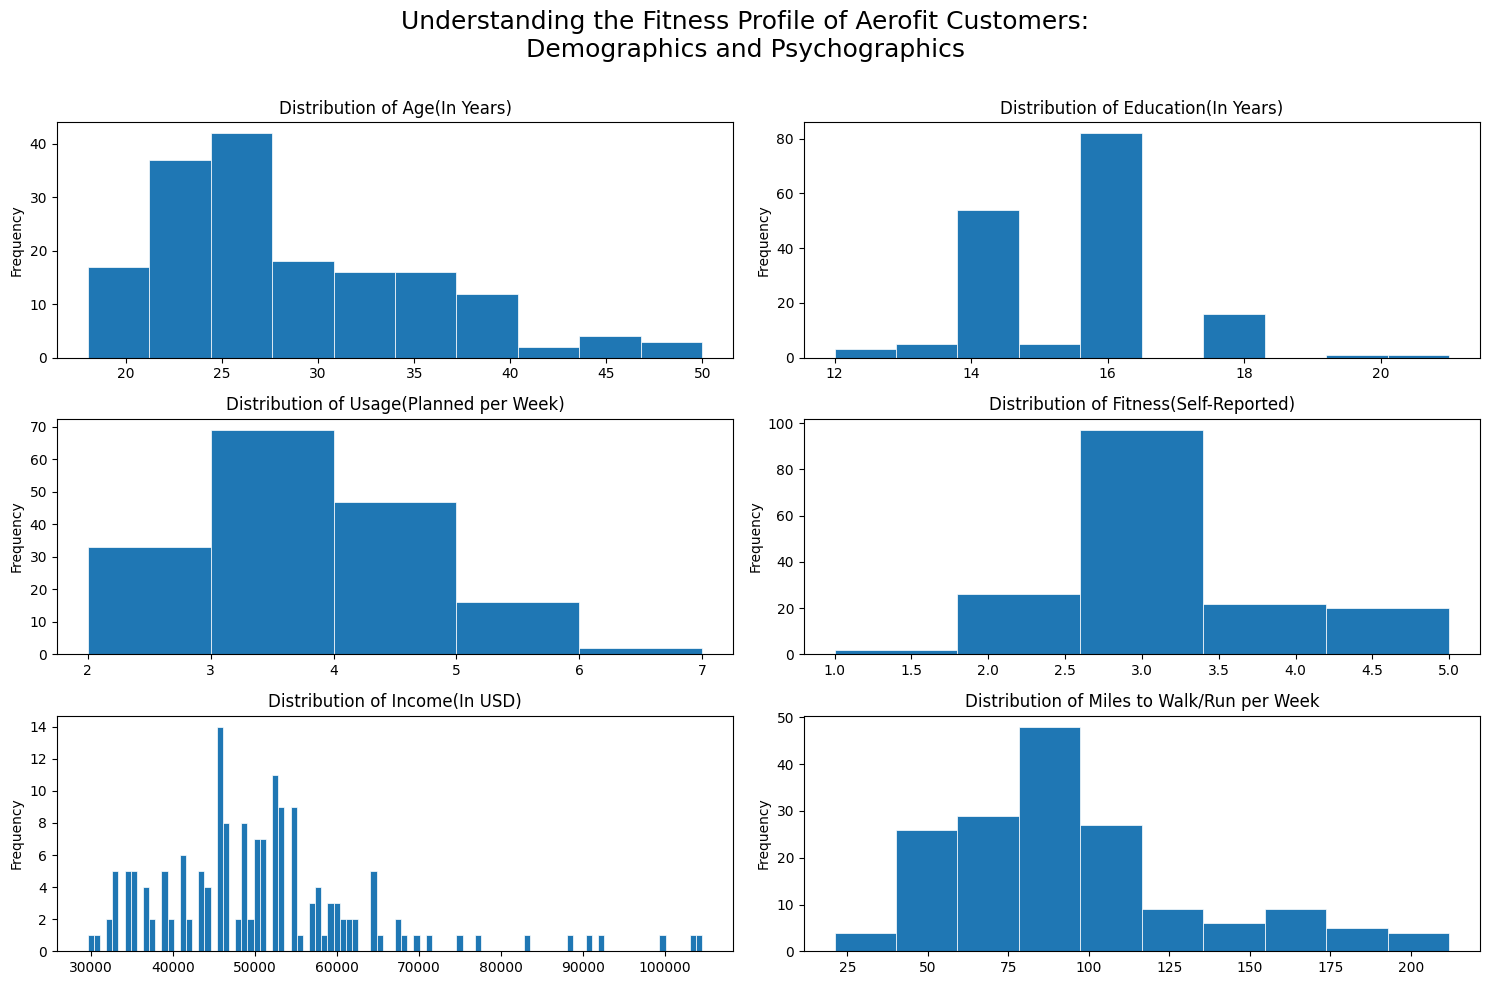

In [ ]:
# setting the number, orientation, and sizes of various subplots
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(15,10))
fig.suptitle('Understanding the Fitness Profile of Aerofit Customers:\nDemographics and Psychographics\n', size = 18)

# plotting distribution/histogram plot for numeric features

axes[0,0].hist(af_outliers_removed['Age'],bins=10, linewidth=0.5, edgecolor="white")
axes[0,0].set(xlabel='', ylabel='Frequency')
axes[0,0].set_title("Distribution of Age(In Years)");

axes[0,1].hist(af_outliers_removed['Education'],bins=10, linewidth=0.5, edgecolor="white")
axes[0,1].set(xlabel='', ylabel='Frequency')
axes[0,1].set_title("Distribution of Education(In Years)");

axes[1,0].hist(af_outliers_removed['Usage'],bins=5, linewidth=0.5, edgecolor="white")
axes[1,0].set(xlabel='', ylabel='Frequency')
axes[1,0].set_title("Distribution of Usage(Planned per Week)");

axes[1,1].hist(af_outliers_removed['Fitness'],bins=5, linewidth=0.5, edgecolor="white")
axes[1,1].set(xlabel='', ylabel='Frequency')
axes[1,1].set_title("Distribution of Fitness(Self-Reported)");

axes[2,0].hist(af_outliers_removed['Income'],bins=100, linewidth=0.5, edgecolor="white")
axes[2,0].set(xlabel='', ylabel='Frequency')
axes[2,0].set_title("Distribution of Income(In USD)");

axes[2,1].hist(af_outliers_removed['Miles'],bins=10, linewidth=0.5, edgecolor="white")
axes[2,1].set(xlabel='', ylabel='Frequency')
axes[2,1].set_title("Distribution of Miles to Walk/Run per Week");

plt.tight_layout()

### **11. Conditional Probabilities:**
- What percent of customers have purchased KP281, KP481, or KP781?


In [ ]:
total_sales = len(af_treadmill)

# Defining treadmill names
treadmill_names = ['KP281', 'KP481', 'KP781']

# taking user input comprising specific treadmill model
user_input = input("Please enter the treadmill model name (KP281, KP481, or KP781): ")

# in case the input string is in lower case or sentence case
upper_cased_name = user_input.upper()

# IF statement calculates sales of a specific model as well as percentage of customers that bought it
if user_input in treadmill_names:
  model_total_purchase = sum(af_treadmill['Product']==upper_cased_name)
  percent_sales = (model_total_purchase / total_sales) * 100

# Printing results
print(f"Out of {total_sales} total sales, {upper_cased_name} was sold {model_total_purchase} times\n")
print(f"Percentage of customers that purchased {upper_cased_name} was: {percent_sales:.2f}%")

Please enter the treadmill model name (KP281, KP481, or KP781): kp781
Out of 180 total sales, KP781 was sold 80 times

Percentage of customers that purchased KP781 was: 44.44%


### **Create frequency tables and calculate the percentage as follows**

#### **_Source consulted for writing code below:_**
https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.crosstab.html


#### **Product – Gender**

**1. Percentage of a Male customer purchasing a treadmill**


In [ ]:
# making a cross table using pandas
gender_product_table = pandas.crosstab(af_treadmill['Product'], af_treadmill['Gender'], normalize='columns') * 100

# calculating percentage of a Male customer purchasing a treadmill
male_treadmill_percent = (sum(af_treadmill['Gender']=='Male') / len(af_treadmill)) * 100

print("%.2f" % male_treadmill_percent, "% of customers who purchased a treadmill were male.")

57.78 % of customers who purchased a treadmill were male.


**2. Percentage of a Female customer purchasing KP781 treadmill**

In [ ]:
# calculating percentage of a Female customer purchasing KP781 treadmill
female_kp781_percent = gender_product_table.loc['KP781', 'Female']

print("%.2f" % female_kp781_percent, "% of customers who purchased the KP781 treadmill were female.")

9.21 % of customers who purchased the KP781 treadmill were female.


**3. Probability of a customer being a Female given that Product is
KP281**

In [ ]:
# calculating probability of a customer being a Female given that Product is KP281
prob_female_given_kp281 = af_treadmill[(af_treadmill['Product'] == 'KP281') & (af_treadmill['Gender'] == 'Female')].shape[0] / af_treadmill[af_treadmill['Product'] == 'KP281'].shape[0]

print("The probability of being a female customer who purchased a KP281 is", "%.1f" % prob_female_given_kp281)

The probability of being a female customer who purchased a KP281 is 0.5


#### **Product – Age**
1. Percentage of customers with Age between 20s and 30s among all
customers

In [ ]:
total_customers = len(af_treadmill["Age"])

cust_20_to_40 = len(af_treadmill[(af_treadmill["Age"] >= 20) & (af_treadmill["Age"] <= 39)])

percent_20to40 = (cust_20_to_40/total_customers) * 100

print("%0.2f" % percent_20to40, "% of customers were in their 20s and 30s")

87.78 % of customers were in their 20s and 30s


#### **Product – Income**

In [ ]:
af_treadmill['Income'].describe()

In [ ]:
# dividing customers into income levels through pandas cut
income_labels = ['low','middle','high']

af_treadmill['IncomeLevel'] = pandas.cut(af_treadmill["Income"],
                  bins=[0,35000,70000,105000],
                  labels = income_labels)

af_treadmill['IncomeLevel'].value_counts()

,count
IncomeLevel,
middle,143
high,23
low,14


<ipython-input-88-1a467d8697a7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_product_distribution = af_treadmill.groupby(['Product', 'IncomeLevel']).size().unstack()


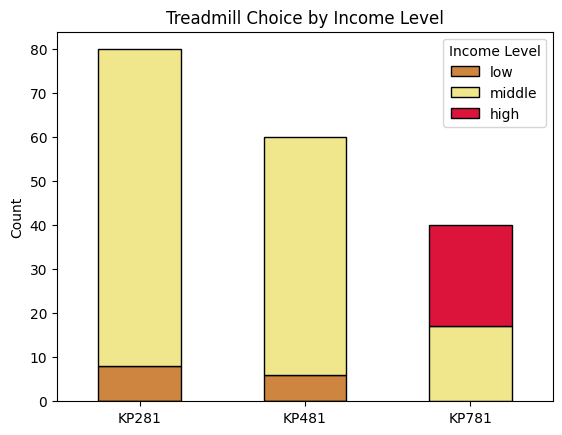

In [ ]:
# To visualize the significant association among product type and income level
income_product_distribution = af_treadmill.groupby(['Product', 'IncomeLevel']).size().unstack()

# Plot the stacked bar chart
income_product_distribution.plot(kind='bar', stacked=True, color=['peru', 'khaki','crimson'], edgecolor=['black'], linewidth=1)
plt.title('Treadmill Choice by Income Level')
plt.xlabel('')
plt.tick_params(axis='x',labelrotation=0)
plt.ylabel('Count')
plt.legend(title='Income Level')
plt.show()

In [ ]:
income_product_distribution

IncomeLevel,low,middle,high
Product,,,
KP281,8,72,0
KP481,6,54,0
KP781,0,17,23


**1. Percentage of a low-income customer purchasing a treadmill**

In [ ]:
total_customers = len(af_treadmill["IncomeLevel"])

percent_low_income_customers = (sum(af_treadmill["IncomeLevel"]=="low") / total_customers) * 100

print("%0.2f" % percent_low_income_customers, "% of treadmill customers fell into the low-income category")

7.78 % of treadmill customers fell into the low-income category


**2. Percentage of a high-income customer purchasing KP781
treadmill**

**3. Percentage of customer with high-income salary buying treadmill
given that Product is KP781**

In [ ]:
# making a cross table for income levels and treadmill models
frequency_table = pandas.crosstab(af_treadmill['Product'], af_treadmill['IncomeLevel'], normalize='columns') * 100

frequency_table

IncomeLevel,low,middle,high
Product,,,
KP281,57.142857,50.349650,0.0
KP481,42.857143,37.762238,0.0
KP781,0.000000,11.888112,100.0


From the cross table above, it seems that the percentages will be similar whether I calculate high-income customers purchasing KP781, or KP781 customers who fall into high-income category. Thus, I write a single code block

In [ ]:
# Percentage of a high-income customer purchasing KP781
high_income_kp781_percent = frequency_table.loc['KP781', 'high']

# Percentage of customers with high-income salary buying a treadmill given that Product is KP781
kp781_high_income_given_percent = frequency_table.loc['KP781', 'high']  # Same as above because KP781 buyers are 100% high-income.

# Prining results
print(f"Percentage of high-income customers purchasing KP781: {high_income_kp781_percent:.1f}%")
print("\n")
print(f"Percentage of high-income salary customers buying a treadmill given KP781: {kp781_high_income_given_percent:.1f}%")

Percentage of high-income customers purchasing KP781: 100.0%


Percentage of high-income salary customers buying a treadmill given KP781: 100.0%


**Product – Fitness**
1. Percentage of customers that have fitness level 5

In [ ]:
total_customers = len(af_treadmill["Fitness"])

percent_5_fitness_customers = (sum(af_treadmill["Fitness"]==5) / total_customers) * 100

print("%0.1f" % percent_5_fitness_customers, "% of treadmill customers rated their fitness 5 (excellent)")

17.2 % of treadmill customers rated their fitness 5 (excellent)


**2. Percentage of a customer with Fitness Level 5 purchasing KP781
treadmill**

**3. Percentage of customer with fitness level 5 buying KP781
treadmill**


In [ ]:
# making a cross table using pandas
fitness_KP781_table = pandas.crosstab(af_treadmill['Fitness'], af_treadmill['Product'], normalize='columns') * 100

# calculating percentage of a Female customer purchasing KP781 treadmill
fit5_kp781_percent = fitness_KP781_table.loc[5,'KP781']

print("%.2f" % fit5_kp781_percent, "% of customers who rated their fitness level 5 purchased the KP781 treadmill.")

72.50 % of customers who rated their fitness level 5 purchased the KP781 treadmill.


**Product –  Marital Status**
1. Percentage of a customers who are partnered using treadmills

In [ ]:
total_customers = len(af_treadmill["MaritalStatus"])

percent_partnered_customers = (sum(af_treadmill["MaritalStatus"]=="Partnered") / total_customers) * 100

print("%0.1f" % percent_partnered_customers, "% of treadmill customers are partnered")

59.4 % of treadmill customers are partnered


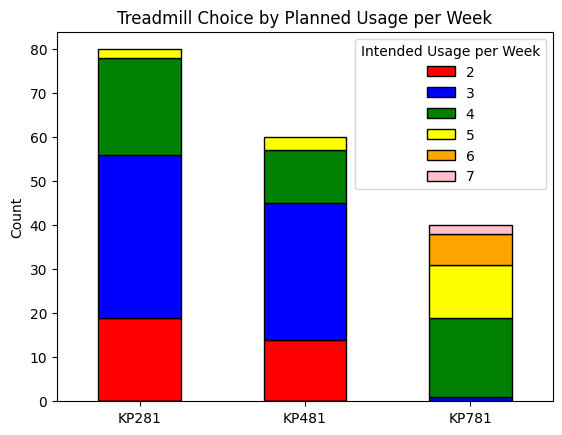

In [ ]:
# To visualize the potential association among usage and treadmill type
usage_product_distribution = af_treadmill.groupby(['Product', 'Usage']).size().unstack()

# Plot the stacked bar chart
usage_product_distribution.plot(kind='bar', stacked=True, color=['red','blue','green','yellow','orange','pink'], edgecolor=['black'], linewidth=1)
plt.title('Treadmill Choice by Planned Usage per Week')
plt.xlabel('')
plt.tick_params(axis='x',labelrotation=0)
plt.ylabel('Count')
plt.legend(title='Intended Usage per Week')
plt.show()

In [ ]:
# Miles are numeric, so binning into a categorical feature using cut()

binnames = ['Less than 100','Between 100-200','Between 200-300','More than 300']

af_treadmill['Mileslabelled'] = pandas.cut(af_treadmill['Miles'],
                     bins=[0,99,200,300,400],
                     labels=binnames)
af_treadmill['Mileslabelled'].value_counts()

,count
Mileslabelled,
Less than 100,107
Between 100-200,67
Between 200-300,5
More than 300,1


<ipython-input-73-7273d29e3291>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  miles_product_distribution = af_treadmill.groupby(['Product', 'Mileslabelled']).size().unstack()


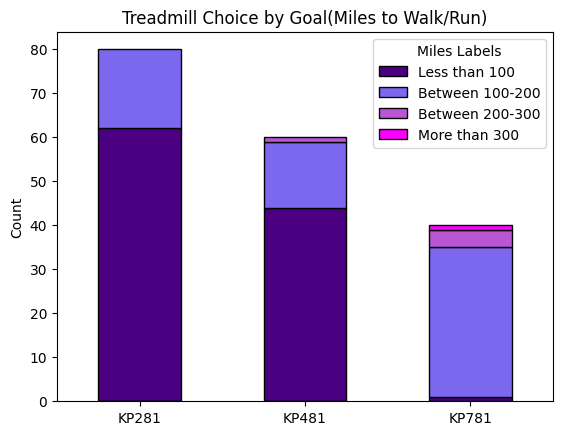

In [ ]:
# To visualize the potential association among miles to run/walk and treadmill type
# It is recommended than future data collection focus on a multiple choice question to understand why customers intend to walk/run a certain number of miles, so choice of treadmill be tailored to their needs

miles_product_distribution = af_treadmill.groupby(['Product', 'Mileslabelled']).size().unstack()

# Plot the stacked bar chart
miles_product_distribution.plot(kind='bar', stacked=True, color=['indigo','mediumslateblue','mediumorchid','magenta'], edgecolor=['black'], linewidth=1)
plt.title('Treadmill Choice by Goal(Miles to Walk/Run)')
plt.xlabel('')
plt.tick_params(axis='x',labelrotation=0)
plt.ylabel('Count')
plt.legend(title='Miles Labels')
plt.show()

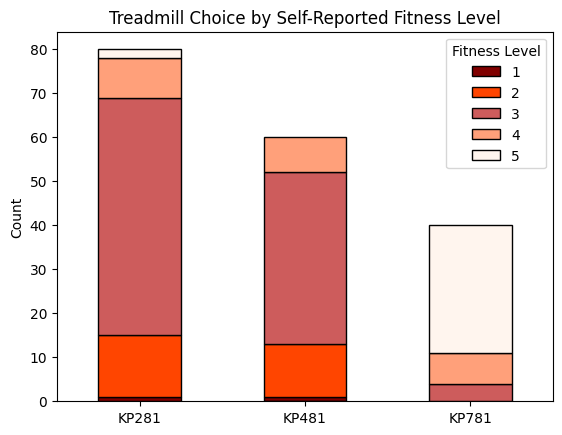

In [ ]:
# To visualize the significant association among fitness level and treadmill type
fitness_product_distribution = af_treadmill.groupby(['Product', 'Fitness']).size().unstack()

# Plot the stacked bar chart
fitness_product_distribution.plot(kind='bar', stacked=True, color=['maroon','orangered','indianred','lightsalmon','seashell'], edgecolor=['black'], linewidth=1)
plt.title('Treadmill Choice by Self-Reported Fitness Level')
plt.xlabel('')
plt.tick_params(axis='x',labelrotation=0)
plt.ylabel('Count')
plt.legend(title='Fitness Level')
plt.show()

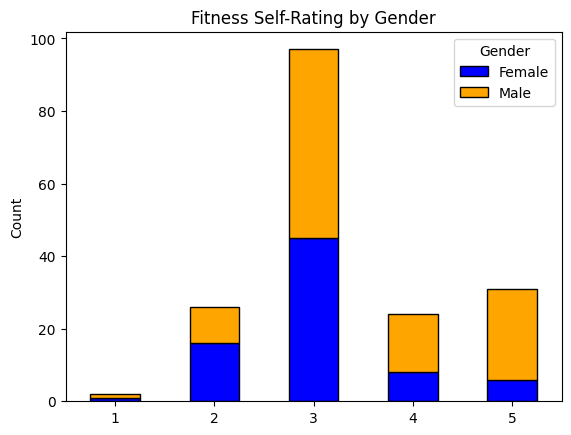

In [ ]:
# To visualize the association among fitness level and gender
fitness_gender_distribution = af_treadmill.groupby(['Fitness', 'Gender']).size().unstack()

# Plot the stacked bar chart
fitness_gender_distribution.plot(kind='bar', stacked=True, color=['blue','orange'], edgecolor=['black'], linewidth=1)
plt.title('Fitness Self-Rating by Gender')
plt.xlabel('')
plt.tick_params(axis='x',labelrotation=0)
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

<ipython-input-9-4de42d470555>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_product_distribution = af_treadmill.groupby(['Product', 'AgeLabelled']).size().unstack()


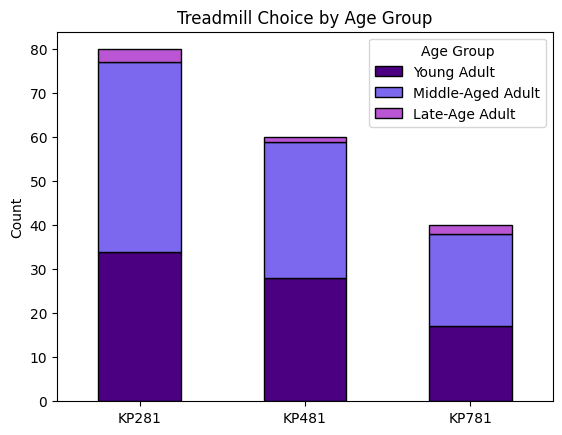

In [ ]:
# To visualize the potential association among age group and treadmill type

age_product_distribution = af_treadmill.groupby(['Product', 'AgeLabelled']).size().unstack()

# Plot the stacked bar chart
age_product_distribution.plot(kind='bar', stacked=True, color=['indigo','mediumslateblue','mediumorchid'], edgecolor=['black'], linewidth=1)
plt.title('Treadmill Choice by Age Group')
plt.xlabel('')
plt.tick_params(axis='x',labelrotation=0)
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

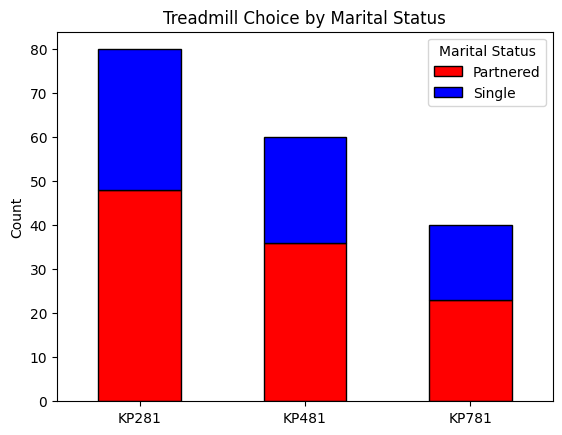

In [ ]:
# To visualize the potential association among marital status and treadmill type

relationship_product_distribution = af_treadmill.groupby(['Product', 'MaritalStatus']).size().unstack()

# Plot the stacked bar chart
relationship_product_distribution.plot(kind='bar', stacked=True, color=['Red','Blue'], edgecolor=['black'], linewidth=1)
plt.title('Treadmill Choice by Marital Status')
plt.xlabel('')
plt.tick_params(axis='x',labelrotation=0)
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()